# Lost in the Sauce of Bat Flight Patterns
**Alexander Mervar**  
**COGS-Q 320**  
**Professor Izquierdo**

This project looks to simulate bat flight patterns in an artistic way. Initial inspiration from [episode 432](https://99percentinvisible.org/episode/the-batman-and-the-bridge-builder/) of [99% Invisible](https://99percentinvisible.org).

Definition of Bat Class 1.0

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TODO:
# DONE - Completed 1.0 Version

In [3]:
class Bat:

    def __init__(self):
        
        # Here I initialize all of the variables for the Bat class
        self.xpos = 0.0                                       # bat's x position, starts in middle of world
        self.ypos = 0.0                                       # bat's y position, starts in middle of world
        self.orientation = np.random.random()*2*np.pi         # bat's orientation, starts at random
        self.velocity = 0.0                                   # bat's velocity, starts at 0
        self.radius = 1.0                                     # the size/radius of the bat
        # The ear variables are key for echolocation
        self.leftear = 0.0                                    # left ear value
        self.rightear = 0.0                                   # right ear value
        self.leftwing  = 1.0                                  # left wing output
        self.rightwing = 1.0                                  # right wing output
        
        # Attributes to determine the placement of the ears
        self.angleoffset = np.pi/2                                                 # left/right ear angle offset
        self.re_xpos = self.radius * np.cos(self.orientation + self.angleoffset)   # right ear x position
        self.re_ypos = self.radius * np.sin(self.orientation + self.angleoffset)   # right ear y position
        self.le_xpos = self.radius * np.cos(self.orientation - self.angleoffset)   # left ear x position
        self.le_ypos = self.radius * np.sin(self.orientation - self.angleoffset)   # left ear y position
        
        # Bug Eating Attributes
        self.killCount = 0
        self.satisfied = False

    def echoLocate(self,bug):
        # This function is what is used to calibrate the ears in order to track an object
        # It's important to realize that if the bat is satisfied (it has eaten enough) 
        # it will change what it tracks
        if self.satisfied == False:
        
            # Calculate the distance of the insect for each of the sensors
            self.leftear = 1 - np.sqrt((self.le_xpos-bug.xpos)**2 + (self.le_ypos-bug.ypos)**2)/10
            self.leftear = np.clip(self.leftear,0,1)
            self.rightear = 1 - np.sqrt((self.re_xpos-bug.xpos)**2 + (self.re_ypos-bug.ypos)**2)/10
            self.rightear = np.clip(self.rightear,0,1)
        
        else:
            self.returnHome()
            
    # Uses the ear values to set the strength levels of the wings in order to have a proper and accurate
    # flight pattern
    def setFlight(self):
        if self.rightear > .95 and self.leftear > .95:
            self.rightwing = 0.10
            self.leftwing = 0.10
        elif self.rightear > self.leftear:
            self.rightwing = 0.25
            self.leftwing = 0.5
        elif self.leftear > self.rightear:
            self.rightwing = 0.5
            self.leftwing = 0.25
            
    def eatBug(self, bug):
        #kills the given object of the bug class
        bug.die()
        self.killCount += 1
        if self.killCount == 1:
            self.satisfied = True
        
    def returnHome(self):
        #send the bat back to it's intial position (for now, this is set at (0,0))
        self.leftear = 1 - np.sqrt((self.le_xpos-0)**2 + (self.le_ypos-0)**2)/10
        self.rightear = 1 - np.sqrt((self.re_xpos-0)**2 + (self.re_ypos-0)**2)/10
        
    def move(self):
        
        # Update the orientation and velocity of the vehicle based on the left and right motors
        self.rightwing = np.clip(self.rightwing,0,1)
        self.leftwing  = np.clip(self.leftwing,0,1)
        self.orientation += ((self.leftwing - self.rightwing)/10) + np.random.normal(0,0.1)
        self.velocity = ((self.rightwing + self.leftwing)/2)/50
        
        # Update position of the agent
        self.xpos += self.velocity * np.cos(self.orientation) 
        self.ypos += self.velocity * np.sin(self.orientation)  
        
        # Update position of the sensors
        self.re_xpos = self.xpos + self.radius * np.cos(self.orientation + self.angleoffset)
        self.re_ypos = self.ypos + self.radius * np.sin(self.orientation + self.angleoffset)
        self.le_xpos = self.xpos + self.radius * np.cos(self.orientation - self.angleoffset)
        self.le_ypos = self.ypos + self.radius * np.sin(self.orientation - self.angleoffset)

    # Calculates the distance of the bat from the given bug object
    def distance(self,bug):
        return np.sqrt((self.xpos-bug.xpos)**2 + (self.ypos-bug.ypos)**2)

class Bug:  

    # This class is used to create the bug objects and below are the necessary variables to achieve
    # biologically accurate flight
    def __init__(self):
        angle = np.random.random()*2*np.pi
        self.xpos = 10.0 * np.cos(angle)                      # bug's x position, starts in middle of world
        self.ypos = 10.0 * np.sin(angle)                      # bug's y position, starts in middle of world
        self.orientation = np.random.random()*2*np.pi         # bug's orientation, starts at random
        self.velocity = 0.0                                   # bug's velocity, starts at 0
        self.radius = 0.5                                     # the size/radius of the bug
        self.leftwing = 0.0                                   # the strength of the left wing of the bug
        self.rightwing = 0.0                                  # the strength of the right wing of the bug
        self.lifeStatus = 1
    # For this project, the bugs are given no objective. Because of this, their flight pattern is random.
    # This was an interesting challenge. Please see write up, below.
    def setFlight(self):
        self.rightwing = random.uniform(0, 0.8)
        self.leftwing = random.uniform(0,0.8)
    
    # I use the integers 0 and 1 to act as booleans to keep track of the bug's lifeStatus 
    # (if the bug is dead or alive)
    def die(self):
        self.lifeStatus = 0
        
    def move(self):
        
        if self.lifeStatus == 1:
        
            # Update the orientation and velocity of the vehicle based on the left and right motors
            self.rightwing = np.clip(self.rightwing,0,1)
            self.leftwing  = np.clip(self.leftwing,0,1)
            self.orientation += ((self.leftwing - self.rightwing)/10) + np.random.normal(0,0.1)
            self.velocity = ((self.rightwing + self.leftwing)/2)/50
        
            # Update position of the agent
            self.xpos += self.velocity * np.cos(self.orientation) 
            self.ypos += self.velocity * np.sin(self.orientation)
        else:
            self.lifeStatus = 0

# Bat vs. Bug (One-on-One)

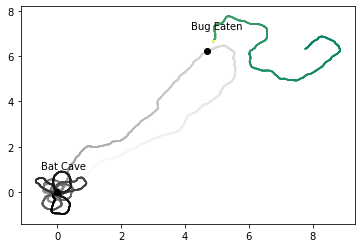

In [4]:
# Initialize the Bat object and the Bug object
a = Bat()
b = Bug()

# Set duration of simulation
duration = 5000

# Arrays to track the position of the bat and bug
batXPos = np.zeros(duration)
batYPos = np.zeros(duration)
bugXPos = np.zeros(duration)
bugYPos = np.zeros(duration)

# Main simulation loop.
for t in range(duration):
    a.echoLocate(b)
    a.setFlight()
    a.move()
    if a.distance(b) < 0.5:
        a.eatBug(b)
        # When the bat agent is close enough to the bug, this is how I keep track of where the kill is
        # this is also where I cause the bug's lifeStatus to change and for this simulation, where the Bat
        # becomes satisfied
        killX = a.xpos
        killY = a.ypos
        a.satisfied = True
    b.setFlight()
    b.move()
    batXPos[t] = a.xpos
    batYPos[t] = a.ypos
    bugXPos[t] = b.xpos
    bugYPos[t] = b.ypos

# Plotting the simulation
plt.plot(0.0,0.0,"ko")
plt.plot(killX, killY, "ko")
plt.text(killX-0.5,killY+1.0, "Bug Eaten")
plt.text(-0.5,1.0,"Bat Cave")
plt.scatter(bugXPos, bugYPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(batXPos,batYPos,s=0.5, c=range(duration), cmap="Greys")
plt.show()

# Bat vs. Bug (One-on-Seven)
### Testing Satisfaction

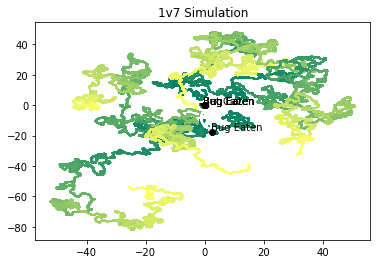

In [5]:
# Initialize Agents
a = Bat()
bugs = []
for i in range(7):
    bugs.append(Bug())

# Set Duration
duration = 100000

# Keep Track of Agents Position
batXPos = np.zeros(duration)
batYPos = np.zeros(duration)
bug1XPos = np.zeros(duration)
bug1YPos = np.zeros(duration)
bug2XPos = np.zeros(duration)
bug2YPos = np.zeros(duration)
bug3XPos = np.zeros(duration)
bug3YPos = np.zeros(duration)
bug4XPos = np.zeros(duration)
bug4YPos = np.zeros(duration)
bug5XPos = np.zeros(duration)
bug5YPos = np.zeros(duration)
bug6XPos = np.zeros(duration)
bug6YPos = np.zeros(duration)
bug7XPos = np.zeros(duration)
bug7YPos = np.zeros(duration)

# Keep Track of Kills
killsX = np.zeros(5)
killsY = np.zeros(5)

# Keep Track of How Many Bugs Bat has Killed
bugsKilled = 0

# Run Simulation
for t in range(duration):
    a.echoLocate(bugs[bugsKilled])
    a.setFlight()
    a.move()
    # Implement Bug Killing
    if a.distance(bugs[bugsKilled]) < 0.5:
        a.eatBug(bugs[bugsKilled])
        killsX[bugsKilled] = a.xpos
        killsY[bugsKilled] = a.ypos
        # Denotes if the bat is satisfied and can return home
        if bugsKilled >= 5:
            a.satisfied = True
    # Update Bug Positions
    for i in range(7):
        bugs[i].setFlight()
        bugs[i].move()
    
    # Track Bat Positon
    batXPos[t] = a.xpos
    batYPos[t] = a.ypos
    # Track Bug(s) Position
    # Yes, this is very sloppy
    for i in range(7):
        if i == 0:
            bug1XPos[t] = bugs[i].xpos
            bug1YPos[t] = bugs[i].ypos
        elif i == 1:
            bug2XPos[t] = bugs[i].xpos
            bug2YPos[t] = bugs[i].ypos
        elif i == 2:
            bug3XPos[t] = bugs[i].xpos
            bug3YPos[t] = bugs[i].ypos
        elif i == 3:
            bug4XPos[t] = bugs[i].xpos
            bug4YPos[t] = bugs[i].ypos
        elif i == 4:
            bug5XPos[t] = bugs[i].xpos
            bug5YPos[t] = bugs[i].ypos
        elif i == 5:
            bug6XPos[t] = bugs[i].xpos
            bug6YPos[t] = bugs[i].ypos
        elif i == 6:
            bug7XPos[t] = bugs[i].xpos
            bug7YPos[t] = bugs[i].ypos
        # Just in case
        else:
            print("Error with Bugs Positions")


# Plot
plt.plot(0.0,0.0,"ko")
for i in range(5):
    plt.plot(killsX[i], killsY[i], "ko")
    plt.text(killsX[i]-0.5,killsY[i]+1.0, "Bug Eaten")
plt.text(-0.5,1.0,"Bat Cave")

# Plot Bugs
plt.scatter(bug1XPos, bug1YPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(bug2XPos, bug2YPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(bug3XPos, bug3YPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(bug4XPos, bug4YPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(bug5XPos, bug5YPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(bug6XPos, bug6YPos,s=0.5,c=range(duration), cmap="summer")
plt.scatter(bug7XPos, bug7YPos,s=0.5,c=range(duration), cmap="summer")

# Plot Bat
plt.scatter(batXPos,batYPos,s=0.5, c=range(duration), cmap="Greys")
plt.title("1v7 Simulation")
plt.show()

In [6]:
print("Is the bat satisfied: " + str(a.satisfied))
print("Bat's X Position: " + str(a.xpos))
print("Bat's Y Position: " + str(a.ypos))

if abs(a.xpos) < 1 and abs(a.ypos) < 1 and a.satisfied:
    print("The bat has returned home and is satisfied!")

Is the bat satisfied: True
Bat's X Position: -0.460612350253259
Bat's Y Position: -0.03585101063152815
The bat has returned home and is satisfied!


As we can see with the above two simulations, this system works well and the bat is satisfied and still returns home.

# Written Report

As stated above, the initial idea of this project came from listening to episode [episode 432](https://99percentinvisible.org/episode/the-batman-and-the-bridge-builder/) of [99% Invisible](https://99percentinvisible.org). In conjunction with this podcast, I was also fascinated by [ant colony optimization models](https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms) and their visually interesting ways of descibing a biological agent traversing through its environment. Through these two things, I wanted if I could make a similar more simplified system that could simulate the flight pattern and insect tracking capabilities of a Bat.

This did also rely on the fact that I would also need to create some sort of valid representation of a bug for teh bat to track as well but, my initial desire was just to get a bat working in the environment.

When looking at ways to code this project, I took initial inspiration from the [Braitenberg Vehicles](https://en.wikipedia.org/wiki/Braitenberg_vehicle) we had worked on in the past. The Braitenberg vehicles gave an excellent initial skeleton to build my codebase off of. But, to make significant progress, I had to make major rewrites to many pieces of the codebase.

For instance, the initial Braitenberg vehicle (at the stage that I had left it) was clumsy and didn't really mimic a bat at all. In addition, the model currently had no substantial way to interact with another class, which was necessary for me to be able to create a Bat class that could handle interacting with a Bug class that was unique as well.

The Bat class has a few interesting additions that I'd like to touch on. First, I'd like to talk about the echolocate function. The function works in conjunction with the primary simulation loop to create a biologically simplified version of echolocation. Admittedly, if I had more time, this aspect of the project is where I'd branch more into as simply tracking the agents and having them interact with each other became more work than needed and I feel like pursuing something like an animation would take away from necessary development time for a better echolocation system. No matter, this system took awhile to create due to the fact that I am no longer tracking a stationary objective instead, I am tracking an agent that changes its position randomly and my system of tracking needs to be intuitive enough to consistently and effectively track these agents. As you can see from the 1v1 model. I succeeded in this area.

I then began development on the eatBug and returnHome functions which are crucial for what I see as the most interesting aspect of the project at its current state. The fact that the Bat agent tracks how satiated it becomes as it "eats" the Bug object and then once satisfied, the agent returns to it's place of origin. This became tricky because I had to make sure that both classes were compatible with one another while also being sure to have constants defined outside of the class for easy simulation creation and implementation.

I believe the remainder of the functions in the Bat class are self explanatory.

In the Bug class, much is self explanatory as it is in some ways similar to the Bat class with a few exceptions. The Bug class is designed to simulate a random flight pattern, which can be seen in the codebase. In addition, the Bug class does have one other variable that is used to see of the Bug is alive, if it is not alive, the Bug will not be able to move and will return its current position until the end of the simulation if called upon.

After the classes were designed, which was the bulk of my work, I used the remainder of my time testing the classes and debugging in order to present visually appealing and interesting graphs. The 1v1 model accurately depicts the Bat and how it intereacts with a singular Bug agent and the 1v7 model allows for me to demonstrate that the Bat agent is able to handle multiple Bug agents, move between them, satisfy itself, and then successfully return home.

Overall, I see this project as a success. If I had more time I'd like to work further on echolocation to see how far I could go with it. Therefore, I don't believe pursuing an animation would be a worthwile addendum to this project.